<a href="https://colab.research.google.com/github/Manav-Gupta/Solar-Irradiance-Bio-Inspired/blob/main/CuckooLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import keras
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from datetime import datetime

Using TensorFlow backend.


In [ ]:
dataset=pd.read_csv('jodhpur.csv')
dataset.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2010,1,1,0,30,0,0,0,-5,11.852440,996.147217,29.790052,36.635731,2.722316
1,2010,1,1,1,30,0,0,0,-5,11.225597,996.248657,30.983252,38.746647,2.707211
2,2010,1,1,2,30,0,0,0,-5,10.658190,995.821533,32.399748,41.129784,2.798367
3,2010,1,1,3,30,0,0,0,-4,10.129504,995.645081,34.192746,44.009598,2.898466
4,2010,1,1,4,30,0,0,0,-4,9.635840,995.924561,36.213530,47.319065,2.890179
5,2010,1,1,5,30,0,0,0,-4,13.329075,996.727173,29.696787,49.007072,3.624711
6,2010,1,1,6,30,0,0,0,-3,12.871681,997.495850,31.083023,57.249115,3.618878
7,2010,1,1,7,30,0,0,0,-3,13.520990,998.175964,31.173157,64.765450,3.562192
8,2010,1,1,8,30,80,292,135,-2,16.388988,998.849304,27.988229,70.387955,3.084073
9,2010,1,1,9,30,118,577,331,0,19.753776,999.441589,25.638371,72.587616,2.419390


    Month  Day  Hour  ...    Pressure  Relative Humidity  Wind Speed
0       1    1     0  ...  996.147217          29.790052    2.722316
1       1    1     1  ...  996.248657          30.983252    2.707211
2       1    1     2  ...  995.821533          32.399748    2.798367
3       1    1     3  ...  995.645081          34.192746    2.898466
4       1    1     4  ...  995.924561          36.213530    2.890179
5       1    1     5  ...  996.727173          29.696787    3.624711
6       1    1     6  ...  997.495850          31.083023    3.618878
7       1    1     7  ...  998.175964          31.173157    3.562192
8       1    1     8  ...  998.849304          27.988229    3.084073
9       1    1     9  ...  999.441589          25.638371    2.419390
10      1    1    10  ...  999.189270          21.699108    2.170230
11      1    1    11  ...  998.304016          18.483890    1.936101
12      1    1    12  ...  997.064331          17.682752    1.393144
13      1    1    13  ...  996.438

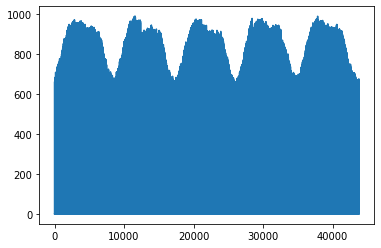

In [ ]:
#Reading the dataset
dataset=pd.read_csv('jodhpur.csv')
#Removing unnecessary data
dataset.drop('Minute',axis=1,inplace=True)
dataset.drop('Year',axis=1,inplace=True)
dataset.drop('DHI',axis=1,inplace=True)
dataset.drop('DNI',axis=1,inplace=True)
dataset.drop('Wind Direction',axis=1,inplace=True)
dataset.columns=['Month','Day','Hour','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']
dataset = dataset[['Month','Day','Hour','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']]
print(dataset.head(20))


dataset.to_csv('final.csv')
plt.plot(dataset['GHI'])

In [ ]:
#Seperating the output and features
dataset=pd.read_csv('final.csv',header=0,index_col=0)
dataset1=dataset.values
dataset2=dataset['GHI'].values
dataset.head()

,Month,Day,Hour,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed
0,1,1,0,0,-5,11.852440,996.147217,29.790052,2.722316
1,1,1,1,0,-5,11.225597,996.248657,30.983252,2.707211
2,1,1,2,0,-5,10.658190,995.821533,32.399748,2.798367
3,1,1,3,0,-4,10.129504,995.645081,34.192746,2.898466
4,1,1,4,0,-4,9.635840,995.924560,36.213530,2.890179


In [ ]:
#Scaling data
scale_x = MinMaxScaler(feature_range=(0,1))
scaled_x=scale_x.fit_transform(dataset1)
print(scaled_x.shape)

dataset2=dataset2.reshape(-1, 1)
scale_y = MinMaxScaler(feature_range=(0,1))
scaled_y=scale_y.fit_transform(dataset2)
print(scaled_y.shape)

(43800, 9)
(43800, 1)


In [ ]:
# vector to matrix conversion function for weights matrix
def vect_to_mat(w,W0,W1,W3):
  
  hn=64
  for i in range(9):
    for j in range(4*hn):
      W0[i][j]=w[(i*j)+j]
  for i in range(hn):
    for j in range(4*hn):
      W1[i][j]=w[(i*j)+j+(4*hn*9)]
  W2=[]
  W21=[]
  for i in range(4*hn):
    value=w[i+(4*hn*9)+(4*hn*hn)]
    W21.append(value)
  W2=np.asarray(W21) 

  for i in range(hn):
    for j in range(1):
      W3[i][j]=w[(i*j)+j+(4*hn*9)+(4*hn*hn)+(4*hn)]
  Weight=(np.asarray(W0),np.asarray(W1),(W2),np.asarray(W3))
  return Weight 

(43764, 35, 9)
35
64
Train on 30634 samples, validate on 4377 samples
Epoch 1/1
30634/30634 [==============================] - 2s 75us/step - loss: 0.8411 - val_loss: 0.3762
(43739, 60, 9)
60
64
Train on 30617 samples, validate on 4374 samples
Epoch 1/1
30617/30617 [==============================] - 3s 87us/step - loss: 0.4844 - val_loss: 0.3658
(43750, 49, 9)
49
64
Train on 30624 samples, validate on 4376 samples
Epoch 1/1
30624/30624 [==============================] - 3s 90us/step - loss: 0.6952 - val_loss: 0.4790
(43717, 82, 9)
82
64
Train on 30601 samples, validate on 4372 samples
Epoch 1/1
30601/30601 [==============================] - 3s 106us/step - loss: 1.1202 - val_loss: 1.3967
before updating  [60]
after updating  [30]
(43769, 30, 9)
30
64
Train on 30638 samples, validate on 4377 samples
Epoch 1/1
30638/30638 [==============================] - 3s 98us/step - loss: 0.4608 - val_loss: 0.2858
before updating  [30]
after updating  [35]
(43764, 35, 9)
35
64
Train on 30634 samples

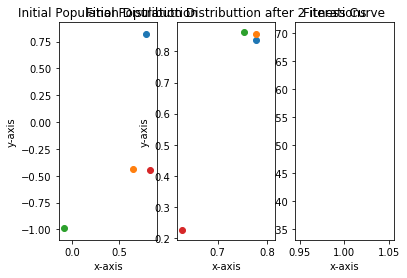

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import csv
import random
from math import sqrt
import sklearn.metrics as metrics

# INITIALIZATION
population_size = 15
max_generation = 15
_lambda = 1.5
max_domain = 1
min_domain = -1
max_domain1 = 100
min_domain1 = 1
max_domain2 = 256
min_domain2 = 1
step_size_cons = 0.01
step_size_cons1 = 5
Pa = 0.3
dimension = 19008
x = []
y = []

# CALCULATING ACCURACY USING r2 SCORE (since this model is currently getting used as a regression model)
def accuracy(window, array, data, labels):
    
    ws=window[0]
    hn=64
    
    x=list()
    y=list()
    for i in range(len(dataset)-ws-1):
      xx=list()
      for j in range(0,ws,1):
        value=scaled_x[i+j]
        xx.append(value)
      x.append(xx)
      yy=scaled_y[i+ws]
      y.append(yy)
    #Input of  LSTM 
    x=np.array(x)
    #Output of LSTM
    y=np.array(y)
    print(x.shape)


    #Splitting data into training 70% , testing 15% and validation 15%
    n_train_hours = int(0.7*len(x))
    n_valid_hours = int(0.8*len(x))

    train_x = x[:n_train_hours]
    test_x = x[n_valid_hours:]
    valid_x= x[n_train_hours:n_valid_hours]

    train_y = y[:n_train_hours]
    test_y = y[n_valid_hours:]
    valid_y= y[n_train_hours:n_valid_hours]

    model = Sequential()
    model.add(LSTM(hn, input_shape=(ws,9),kernel_initializer='truncated_normal'))
    model.add(Dense(1,activation='linear'))
    weight1=model.get_weights()
    w0=weight1[0]
    w1=weight1[1]
    w2=weight1[2]
    w3=weight1[3]
    W0=w0
    W1=w1
    W3=w3
    WEight=vect_to_mat(array,W0,W1,W3)
    model.set_weights(WEight)
    model.compile(loss='mae', optimizer=Adam(lr=0.01))
    history = model.fit(train_x, train_y, epochs=100, batch_size=15058, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
    yhat = model.predict(train_x)

    inv_yhat = scale_y.inverse_transform(yhat)

    inv_y = scale_y.inverse_transform(train_y)

    acc = metrics.r2_score(inv_y, inv_yhat)
    return acc

# OBJECTIVE FUNCTION
def rmse(window,array, data, labels):  # CONVERTING THIS FUNCTION INTO rmse FUNC OF LSTM
    
    ws=window[0]
    hn=64
    x=list()
    y=list()
    for i in range(len(labels)-ws-1):
      xx=list()
      for j in range(0,ws,1):
        value=scaled_x[i+j]
        xx.append(value)
      x.append(xx)
      yy=scaled_y[i+ws]
      y.append(yy)
    #Input of  LSTM 
    x=np.array(x)
    #Output of LSTM
    y=np.array(y)
    print(x.shape)


    #Splitting data into training 70% , testing 15% and validation 15%
    n_train_hours = int(0.7*len(x))
    n_valid_hours = int(0.8*len(x))

    train_x = x[:n_train_hours]
    test_x = x[n_valid_hours:]
    valid_x= x[n_train_hours:n_valid_hours]

    train_y = y[:n_train_hours]
    test_y = y[n_valid_hours:]
    valid_y= y[n_train_hours:n_valid_hours]
    print(ws)
    print(hn)

    model = Sequential()
    model.add(LSTM(hn, input_shape=(ws,9),kernel_initializer='truncated_normal'))
    model.add(Dense(1,activation='linear'))
    weight1=model.get_weights()
    w0=weight1[0]
    w1=weight1[1]
    w2=weight1[2]
    w3=weight1[3]
    W0=w0
    W1=w1
    W3=w3    
    WEight=vect_to_mat(array,W0,W1,W3)
    model.set_weights(WEight)
    model.compile(loss='mae', optimizer=Adam(lr=0.01))
    history = model.fit(train_x, train_y, epochs=100, batch_size=15058, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
    yhat = model.predict(train_x)

    inv_yhat = scale_y.inverse_transform(yhat)

    inv_y = scale_y.inverse_transform(train_y)

    fitness = sqrt(mean_squared_error(inv_y, inv_yhat))
   
    return fitness

# LEVY FLIGHT
def levy_flight(Lambda):
    sigma1 = np.power((math.gamma(1 + Lambda) * np.sin((np.pi * Lambda) / 2)) \
                      / math.gamma((1 + Lambda) / 2) * np.power(2, (Lambda - 1) / 2), 1 / Lambda)
    sigma2 = 1
    u = np.random.normal(0, sigma1, size=dimension)
    v = np.random.normal(0, sigma2, size=dimension)
    step = u / np.power(np.fabs(v), 1 / Lambda)

    return step
def levy_flight1(Lambda):
    sigma1 = np.power((math.gamma(1 + Lambda) * np.sin((np.pi * Lambda) / 2)) \
                      / math.gamma((1 + Lambda) / 2) * np.power(2, (Lambda - 1) / 2), 1 / Lambda)
    sigma2 = 1
    u = np.random.normal(0, sigma1, size=1)
    v = np.random.normal(0, sigma2, size=1)
    step = u / np.power(np.fabs(v), 1 / Lambda)

    return np.int(step)    

class Individual:
    def __init__(self, data, labels):
        self.__window = np.random.randint(1,100,1)   
        self.__position = np.random.rand(dimension) * (max_domain - min_domain) + min_domain
        self.__fitness = rmse(self.__window, self.__position, data, labels)

    def get_position(self):
        return self.__position
    
    def get_window(self):
        return self.__window


    def get_fitness(self):
        return self.__fitness

    def set_position(self, position):
        self.__position = position

    def set_window(self, window):
        self.__window = window

    def set_fitness(self, fitness):
        self.__fitness = fitness

    def abandon(self, data, labels):
        # abandon some variables
        for i in range(dimension): 
            p = np.random.rand()
            if p < Pa:
                self.__position[i] = np.random.rand() * (max_domain - min_domain) + min_domain        
        p1 = np.random.rand()
        if p1 < Pa:
          self.__window = np.random.randint(1,100,1)
        self.__fitness = rmse(self.__window, self.__position, data, labels)

def main():


      # RANDOMLY CREATING HOSTS
  cs_list = []
  for i in range(population_size):
      cs_list.append(Individual(scaled_x, scaled_y))


      # SORT TO GET THE BEST FITNESS
  cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

  best_fitness = cs_list[0].get_fitness()
  best_position = cs_list[0].get_position()
  best_window = cs_list[0].get_window()

  fig = plt.figure()

      # INITIAL POPULATION DISTRIBUTION
  ax1 = fig.add_subplot(131)
  for i in range(population_size):
          ax1.scatter([cs_list[i].get_position()[0]], [cs_list[i].get_position()[1]])
  ax1.set_title('Initial Population Distributtion')
  ax1.set_xlabel('x-axis')
  ax1.set_ylabel('y-axis')

  ax3 = fig.add_subplot(133)

  t = 1
  while t < max_generation:

          # GENERATING NEW SOLUTIONS
          for i in range(population_size):

              # CHOOSING A RANDOM CUCKOO (say i)
              i = np.random.randint(low=0, high=population_size)
              print("before updating " , cs_list[i].get_window())
              # SETTING ITS POSITION USING LEVY FLIGHT
              position = (cs_list[i].get_position())+(step_size_cons*levy_flight(_lambda))
              window = (cs_list[i].get_window())+(step_size_cons1*levy_flight1(_lambda))
              print("after updating " , window )

              # Simple Boundary Rule
              for k in range(dimension):
                  if position[k] > max_domain:
                      position[k] = max_domain
                  if position[k] < min_domain:
                      position[k] = min_domain
              if window[0] > max_domain1:
                window[0] = max_domain1
              if window[0] < min_domain1:
                window[0] = min_domain1          

                                  
              cs_list[i].set_position(position)
              cs_list[i].set_window(window)
              cs_list[i].set_fitness(rmse(cs_list[i].get_window(),cs_list[i].get_position(), scaled_x, scaled_y))
              
              # CHOOSING A RANDOM HOST (say j)
              j = np.random.randint(0, population_size)
              while j == i:  # random id[say j] ≠ i
                  j = np.random.randint(0, population_size)

              # RELAXATION
              if cs_list[j].get_fitness() > cs_list[i].get_fitness():
                  cs_list[j].set_position(cs_list[i].get_position())
                  cs_list[j].set_fitness(cs_list[i].get_fitness())
                  cs_list[j].set_window(cs_list[i].get_window())


          # SORT (to Keep Best)
          cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

          # ABANDON SOLUTION (exclude the best)
          for a in range(1, population_size):
              r = np.random.rand()
              if (r < Pa):
                  cs_list[a].abandon(scaled_x,scaled_y)

          # RANKING THE CS LIST
          cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

          # FIND THE CURRENT BEST
          if cs_list[0].get_fitness() < best_fitness:
              best_fitness = cs_list[0].get_fitness()
              best_position = cs_list[0].get_position()
              best_window = cs_list[0].get_window()

          # PRINTING SOLUTION IN EACH ITERATION
          print("iteration =", t, " best_fitness =", best_fitness)

          # FITNESS ARRAY
          x.append(t)
          y.append(best_fitness)

          t += 1

      # FITNESS PLOTTING
  ax3.plot(x, y)

      # OPTIMIZED WEIGHTS
  print("\nOptimized weights are ", *best_position)
  print("\nOptimized window size is ", *best_window)

    
  print("RMSE of of final LSTM is ", rmse(best_window, best_position, scaled_x, scaled_y))
  print("Accuracy of final ANN is ", accuracy(best_window, best_position, scaled_x, scaled_y))
  print("\nOptimized weights are ", *best_position)
  print("\nOptimized window size is ", *best_window)
      
      # GRAPH FOR FITNESS
  ax3.set_title('Fitness Curve')
  ax3.set_xlabel('x-axis')
  ax3.set_ylabel('y-axis')

      # FINAL POPULATION DISTRIBUTION
  ax2 = fig.add_subplot(132)
  for i in range(population_size):
          ax2.scatter([cs_list[i].get_position()[0]], [cs_list[i].get_position()[1]])
  ax2.set_title('Final Population Distributtion after '+str(t)+' iterations')
  ax2.set_xlabel('x-axis')
  ax2.set_ylabel('y-axis')

      # SHOWING GRAPH
  plt.show()


if __name__ == "__main__":
    main()

In [ ]:
yhat = model.predict(test_x)

inv_yhat = scale_y.inverse_transform(yhat)

inv_y = scale_y.inverse_transform(test_y)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
a=np.asmatrix(inv_y)
b=np.asmatrix(inv_yhat)
np.savetxt("actualwindow&weights.csv", a, delimiter=",")
np.savetxt("predictedwindow&weights.csv", b, delimiter=",")